In [ ]:
pip install opencv-python pytesseract numpy matplotlib


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st

st.title("/content/car")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

if uploaded_file:
    st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
    st.success("Image uploaded successfully!")


2025-05-10 05:59:41.495 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.861 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-10 05:59:41.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.873 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 05:59:41.880 Thread 'MainThread': mi

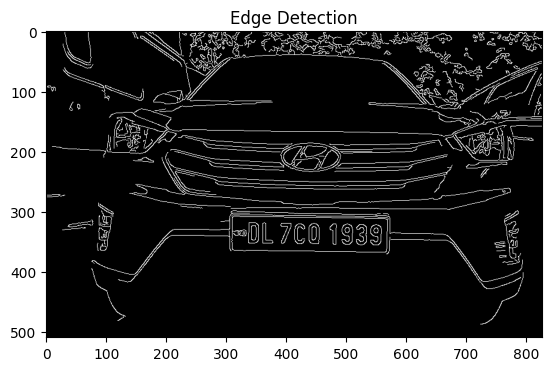

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Set the path for Tesseract OCR (update path accordingly)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load image
image = cv2.imread('/content/car')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply noise reduction and edge detection
blurred = cv2.GaussianBlur(gray, (5,5), 0)
edged = cv2.Canny(blurred, 75, 200)

plt.imshow(edged, cmap='gray')
plt.title('Edge Detection')
plt.show()


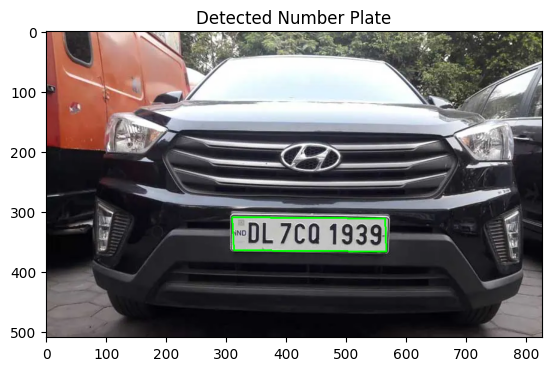

In [ ]:
# Find contours in the edge-detected image
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Loop through contours to find possible number plate
plate_region = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:  # Assuming the plate is a rectangular shape
        plate_region = approx
        break

# Draw the detected plate on the image
if plate_region is not None:
    cv2.drawContours(image, [plate_region], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Number Plate')
plt.show()


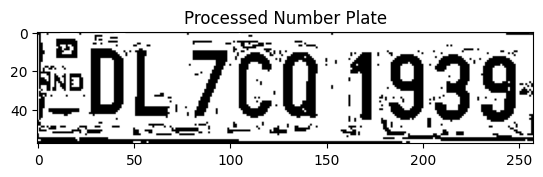

In [ ]:
if plate_region is not None:
    x, y, w, h = cv2.boundingRect(plate_region)
    plate = gray[y:y+h, x:x+w]

    # Apply adaptive thresholding to enhance text visibility
    plate = cv2.adaptiveThreshold(plate, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    plt.imshow(plate, cmap='gray')
    plt.title('Processed Number Plate')
    plt.show()
